In [1]:
import json

import bz2
import regex
from tqdm import tqdm
from scipy import sparse

In [290]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
import random
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [337]:
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.models import lsimodel
from gensim import similarities

In [405]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [175]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tatjana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
responses = []
with bz2.BZ2File('banki_responses.json.bz2', 'r') as thefile:
    for row in tqdm(thefile):
        resp = json.loads(row)
        if not resp['rating_not_checked'] and (len(resp['text'].split()) > 0):
            responses.append(resp)

201030it [03:23, 987.71it/s] 


#  –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ –ø–æ NLP # 1 [100 –±–∞–ª–ª–æ–≤]
## –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –ø–æ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ 

–í —ç—Ç–æ–º –¥–æ–º–∞—à–Ω–µ–º –∑–∞–¥–∞–Ω–∏–∏ –≤–∞–º –ø—Ä–µ–¥—Å—Ç–æ–∏—Ç –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å –ø–æ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ –æ—Ç–∑—ã–≤—ã –Ω–∞ –±–∞–Ω–∫–∏ —Å —Å–∞–π—Ç–∞ banki.ru.

–î–∞–Ω–Ω—ã–µ —Å–æ–¥–µ—Ä–∂–∞—Ç –Ω–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ —Ç–µ–∫—Å—Ç—ã –æ—Ç–∑—ã–≤–æ–≤, –Ω–µ–∫–æ—Ç–æ—Ä—É—é –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é, –∞ —Ç–∞–∫–∂–µ –æ—Ü–µ–Ω–∫—É –ø–æ —à–∫–∞–ª–µ –æ—Ç 1 –¥–æ 5. 

–¢–µ–∫—Å—Ç—ã —Ö—Ä–∞–Ω—è—Ç—Å—è –≤ json-–∞—Ö –≤ –º–∞—Å—Å–∏–≤–µ responses.

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø—Ä–∏–º–µ—Ä –æ—Ç–∑—ã–≤–∞:

In [4]:
responses[99]

{'city': '–≥. –°–∞—Ä–∞—Ç–æ–≤',
 'rating_not_checked': False,
 'title': '–ö–∞—Ä—Ç–∞ –∫–æ –≤–∫–ª–∞–¥—É',
 'num_comments': 0,
 'bank_license': '–ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 880',
 'author': 'ronnichka',
 'bank_name': '–Æ–≥—Ä–∞',
 'datetime': '2015-06-03 20:56:57',
 'text': '–ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! –•–æ—Ç–µ–ª–∞ –Ω–∞–ø–∏—Å–∞—Ç—å, —á—Ç–æ –º–Ω–µ –º–µ—Å—è—Ü –Ω–µ –≤—ã–¥–∞—é—Ç –∫–∞—Ä—Ç—É –∫–æ –≤–∫–ª–∞–¥—É, —Å—Å—ã–ª–∞—è—Å—å –Ω–∞ "–Ω–∞–º –∂–µ –∏—Ö –∏–∑ –°–∞–º–∞—Ä—ã –≤–µ–∑—É—Ç" (–Ω–∞ —Å–µ–∫—É–Ω–¥–æ—á–∫—É 5 —á–∞—Å–æ–≤ –µ–∑–¥—ã –æ—Ç –Ω–∞—à–µ–≥–æ –≥–æ—Ä–æ–¥–∞). –ù–æ! –ü—Ä–æ—á–∏—Ç–∞–ª–∞, —á—Ç–æ –ª—é–¥—è–º 3,5 –º–µ—Å—è—Ü–µ–≤ –Ω–µ –≤—ã–¥–∞—é—Ç –∫–∞—Ä—Ç—É, –∏ –ø–æ–Ω—è–ª–∞, —á—Ç–æ —É –º–µ–Ω—è –≤—Å–µ —Ö–æ—Ä–æ—à–æ, –ø–æ–∫–∞ —á—Ç–æ. –ò –ø–æ–¥–∞—Ä–æ–∫ –º–Ω–µ –¥–∞–ª–∏, –∏ –∫—É–ª–µ—Ä –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–∏ –µ—Å—Ç—å. –¢–∞–∫ —á—Ç–æ —è, –∫–æ–Ω–µ—á–Ω–æ, –≥–æ—Ç–æ–≤–∞ –∂–¥–∞—Ç—å. –ü—Ä–∞–≤–¥–∞ —Ö–æ—Ç–µ–ª–æ—Å—å –±—ã –Ω–µ –æ—á–µ–Ω—å –¥–æ–ª–≥–æ.',
 'rating_grade': 3}

## –ß–∞—Å—Ç—å 1. –ê–Ω–∞–ª–∏–∑ —Ç–µ–∫—Å—Ç–æ–≤ [40/100]

1. –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –≤ —Ä–∞–∑–Ω—ã—Ö –≥–æ—Ä–æ–¥–∞—Ö –∏ –Ω–∞ —Ä–∞–∑–Ω—ã–µ –±–∞–Ω–∫–∏
2. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º—ã –¥–ª–∏–Ω —Å–ª–æ–≤ –≤ —Å–∏–º–≤–æ–ª–∞—Ö –∏ –≤ —Å–ª–æ–≤–∞—Ö
3. –ù–∞–π–¥–∏—Ç–µ 10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö:
    * —Å–ª–æ–≤
    * —Å–ª–æ–≤ –±–µ–∑ —Å—Ç–æ–ø-—Å–ª–æ–≤
    * –ª–µ–º–º 
* —Å—É—â–µ—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã—Ö
4. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –∫—Ä–∏–≤—ã–µ –¶–∏–ø—Ñ–∞ –∏ –•–∏–ø—Å–∞
5. –û—Ç–≤–µ—Ç—å—Ç–µ –Ω–∞ —Å–ª–µ–¥—É—é—â–∏–µ –≤–æ–ø—Ä–æ—Å—ã:
    * –∫–∞–∫–æ–µ —Å–ª–æ–≤–æ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —á–∞—â–µ, "—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" –∏–ª–∏ "–∫–ª–∏–µ–Ω—Ç"?
    * —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —Å–ª–æ–≤–∞ "–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ" –∏ "–¥–æ–≤–µ—Ä–∏–µ"?
6. –í –ø–æ–ª–µ "rating_grade" –∑–∞–ø–∏—Å–∞–Ω–∞ –æ—Ü–µ–Ω–∫–∞ –æ—Ç–∑—ã–≤–∞ –ø–æ —à–∫–∞–ª–µ –æ—Ç 1 –¥–æ 5. –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –º–µ—Ä—É $tf-idf$, –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –Ω–∞–π—Ç–∏ –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ –∏ –±–∏–≥—Ä–∞–º—ã –¥–ª—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ (—Å –æ—Ü–µ–Ω–∫–æ–π 5) –∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ (—Å –æ—Ü–µ–Ω–∫–æ–π 1)

#### 0. –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö –≤ –¥–∞—Ç–∞—Ñ—Ä–∞–π–º

In [5]:
df = pd.DataFrame(responses)

In [6]:
df.head()

city  rating_not_checked  \
0       –≥. –ú–æ—Å–∫–≤–∞               False   
1  –≥. –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫               False   
2       –≥. –ú–æ—Å–∫–≤–∞               False   
3   –≥. –°—Ç–∞–≤—Ä–æ–ø–æ–ª—å               False   
4    –≥. –ß–µ–ª—è–±–∏–Ω—Å–∫               False   

                                               title  num_comments  \
0                                             –ñ–∞–ª–æ–±–∞             0   
1      –ù–µ –º–æ–≥—É –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —É—Å–ª—É–≥–æ–π –°–±–µ—Ä–±–∞–Ω–∫ –æ–Ω-–ª–∞–π–Ω             0   
2                    –î–≤–æ–π–Ω–æ–µ —Å–ø–∏—Å–∞–Ω–∏–µ –∑–∞ –æ–¥–∏–Ω —Ç–æ–≤–∞—Ä.             1   
3  –ú–µ–Ω—è—é—Ç –ø—Ä–æ—Ü–µ–Ω—Ç—ã –∫–æ–º–∏—Å—Å–∏–∏  –Ω–µ –ø—Ä–µ–¥—É–ø—Ä–µ–¥–∏–≤ –∏ –Ω–µ ...             2   
4             –í–µ—Ä–Ω–∏—Ç–µ –¥–µ–Ω–µ–∂–Ω—ã–µ —Å—Ä–µ–¥—Å—Ç–≤–∞ –∑–∞ —Å—Ç—Ä–∞—Ö–æ–≤–∫—É             1   

      bank_license       author        bank_name             datetime  \
0  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2562       uhnov1          –ë–∏–Ω–±–∞–Ω–∫  2015-06-08 12:50:54   
1  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481       Foryou  –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏  2015-06-08 11:09:57   
2  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2562   Vladimir84          –ë–∏–Ω–±–∞–Ω–∫  2015-06-05 20:14:28   
3  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481       643609  –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏  2015-06-05 13:51:01   
4  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2766  anfisa-2003         –û–¢–ü –ë–∞–Ω–∫  2015-06-05 10:58:12   

                                                text  rating_grade  
0  –î–æ–±—Ä—ã–π –¥–µ–Ω—å! –Ø –Ω–µ —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –∏ –ø–æ—Ä...           NaN  
1  –î–æ–±—Ä–æ–≥–æ –¥–Ω—è! –Ø–≤–ª—è—é—Å—å –¥–µ—Ä–∂–∞—Ç–µ–ª–µ–º –∑–∞—Ä–ø–ª–∞—Ç–Ω–æ–π –∫–∞—Ä...           NaN  
2  –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! ¬†–î—É–±–ª–∏—Ä—É—é —Å–≤–æ–µ –∑–∞—è–≤–ª–µ–Ω–∏–µ –æ—Ç 03.0...           NaN  
3  –î–æ–±—Ä—ã–π –¥–µ–Ω—å!! –Ø –æ—Ç–∫—Ä—ã–ª —Ä–∞—Å—á–µ—Ç–Ω—ã–π —Å—á–µ—Ç –≤ –°–±–µ—Ä–ë–∞...           NaN  
4  04.03.2015 –≥. –≤–∑—è–ª–∞ –∫—Ä–µ–¥–∏—Ç –≤ –≤–∞—à–µ–º –±–∞–Ω–∫–µ, –∑–∞—è–≤...           NaN

#### 1. –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –≤ —Ä–∞–∑–Ω—ã—Ö –≥–æ—Ä–æ–¥–∞—Ö –∏ –Ω–∞ —Ä–∞–∑–Ω—ã–µ –±–∞–Ω–∫–∏

1.1 –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –≤ —Ä–∞–∑–Ω—ã—Ö –≥–æ—Ä–æ–¥–∞—Ö

In [7]:
cities = df['city'].value_counts()
cities

–≥. –ú–æ—Å–∫–≤–∞             55354
–≥. –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥    14342
–≥. –ï–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥        2337
–≥. –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫         2300
–≥. –ù–∏–∂–Ω–∏–π –ù–æ–≤–≥–æ—Ä–æ–¥     1976
                      ...  
–≥. –®–µ–º—ã—à–µ–π–∫–∞              1
–≥. –≥. –ê–∑–æ–≤                1
–≥. –ú–û –ñ—É–∫–æ–≤–∫–∞             1
–≥. –õ–∏–º–∞—Å–æ–ª                1
–≥. –¢—é–º–µ–Ω                  1
Name: city, Length: 5823, dtype: int64

1.2 –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –æ —Ä–∞–∑–Ω—ã—Ö –±–∞–Ω–∫–∞—Ö

In [8]:
banks = df['bank_name'].value_counts()
banks

–°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏                            26327
–ê–ª—å—Ñ–∞-–ë–∞–Ω–∫                                 10224
–í–¢–ë 24                                      8185
–†—É—Å—Å–∫–∏–π –°—Ç–∞–Ω–¥–∞—Ä—Ç                            7943
–•–æ—É–º –ö—Ä–µ–¥–∏—Ç –ë–∞–Ω–∫                            7549
                                           ...  
–¢—É–ª—å—Å–∫–∏–π –ü—Ä–æ–º—ã—à–ª–µ–Ω–Ω–∏–∫ ‚Äî –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –æ—Ñ–∏—Å        1
–Æ–≥–æ-–í–æ—Å—Ç–æ–∫                                     1
–Æ–∂–Ω—ã–π –†–µ–≥–∏–æ–Ω                                   1
–¢–∞–π–º –ë–∞–Ω–∫                                      1
–ó–ª–∞—Ç–∫–æ–º–±–∞–Ω–∫                                    1
Name: bank_name, Length: 670, dtype: int64

#### 2. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º—ã –¥–ª–∏–Ω —Å–ª–æ–≤ –≤ —Å–∏–º–≤–æ–ª–∞—Ö –∏ –≤ —Å–ª–æ–≤–∞—Ö

In [9]:
sample = df[['text']]

In [10]:
import re
reg = re.compile("[–ê-–Ø–∞-—è]+")

In [11]:
def words_only(text, regex=reg):
    return " ".join(regex.findall(text))


sample.loc[:, 'text'] = sample.loc[:, 'text'].str.lower()
sample.loc[:, 'text'] = sample.loc[:, 'text'].apply(words_only)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


–ü–æ–¥—Å—á–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å–ª–æ–≤ –≤ –æ—Ç–∑—ã–≤–µ

In [12]:
def word_count(responce):
    tokens = responce.split()
    n_tokens = len(tokens)
    return n_tokens

In [13]:
word_count('–û–±–∏–¥–Ω–æ –∫–æ–≥–¥–∞ –¥–∏–ø–ª–æ–º —Å–∞–º —Å–µ–±—è –Ω–µ –ø–∏—à–µ—Ç')

7

–ü–æ–¥—Å—á–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å–∏–º–≤–æ–ª–æ–≤ –≤ –æ—Ç–∑—ã–≤–µ

In [14]:
def char_count(responce):
    return len(responce)

In [15]:
char_count('–û–±–∏–¥–Ω–æ –∫–æ–≥–¥–∞ –¥–∏–ø–ª–æ–º —Å–∞–º —Å–µ–±—è –Ω–µ –ø–∏—à–µ—Ç')

37

In [16]:
sample.loc[:, 'word_count'] = sample.loc[:, 'text'].apply(word_count)
sample.loc[:, 'char_count'] = sample.loc[:, 'text'].apply(char_count)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [17]:
sample.head()

text  word_count  char_count
0  –¥–æ–±—Ä—ã–π –¥–µ–Ω—å —è –Ω–µ —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –∏ –ø–æ—Ä—É...         213        1432
1  –¥–æ–±—Ä–æ–≥–æ –¥–Ω—è —è–≤–ª—è—é—Å—å –¥–µ—Ä–∂–∞—Ç–µ–ª–µ–º –∑–∞—Ä–ø–ª–∞—Ç–Ω–æ–π –∫–∞—Ä—Ç...         135         971
2  –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ –¥—É–±–ª–∏—Ä—É—é —Å–≤–æ–µ –∑–∞—è–≤–ª–µ–Ω–∏–µ –æ—Ç –≤ –¥–æ –º...          83         500
3  –¥–æ–±—Ä—ã–π –¥–µ–Ω—å —è –æ—Ç–∫—Ä—ã–ª —Ä–∞—Å—á–µ—Ç–Ω—ã–π —Å—á–µ—Ç –≤ —Å–±–µ—Ä–±–∞–Ω–∫...         121         698
4  –≥ –≤–∑—è–ª–∞ –∫—Ä–µ–¥–∏—Ç –≤ –≤–∞—à–µ–º –±–∞–Ω–∫–µ –∑–∞—è–≤–ª–µ–Ω–Ω–∞—è –º–Ω–æ—é —Å...         291        1738

2.1 –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å–ª–æ–≤ –≤ –æ—Ç–∑—ã–≤–µ

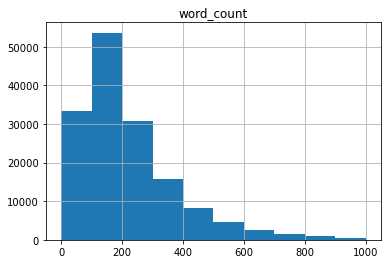

In [18]:
words_count = sample[['word_count']]
words_count = words_count[words_count.word_count < 1000]
words_count.hist()
plt.show()

2.2 –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å–∏–º–≤–æ–ª–æ–≤ –≤ –æ—Ç–∑—ã–≤–µ

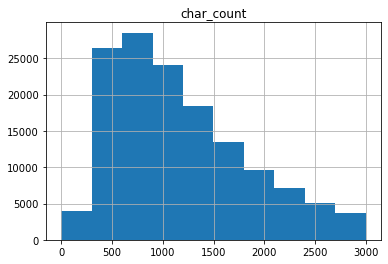

In [19]:
chars_count = sample[['char_count']]
chars_count = chars_count[chars_count.char_count < 3000]
chars_count.hist()
plt.show()

#### 3. –ù–∞–π–¥–∏—Ç–µ 10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö: —Å–ª–æ–≤, –±–µ–∑ —É—á–µ—Ç–∞ —Å—Ç–æ–ø-—Å–ª–æ–≤, –ª–µ–º–º

10 —Å–∞–º—ã—Ö –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö —Å–ª–æ–≤

In [20]:
words = [word for text in sample.text for word in text.split()]

In [21]:
words = pd.DataFrame(words)
words[0].value_counts().head(10)

–≤        1330550
–∏        1058997
–Ω–µ        855335
–Ω–∞        707935
—á—Ç–æ       640057
—è         577500
—Å         464037
–ø–æ        372769
–º–Ω–µ       320958
–±–∞–Ω–∫–∞     275906
Name: 0, dtype: int64

10 —Å–∞–º—ã—Ö –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö —Å–ª–æ–≤ –±–µ–∑ —É—á–µ—Ç–∞ —Å—Ç–æ–ø-—Å–ª–æ–≤

In [22]:
from nltk.corpus import stopwords
mystopwords = stopwords.words('russian') + ['—ç—Ç–æ', '–Ω–∞—à' , '—Ç—ã—Å', '–º–ª–Ω', '–º–ª—Ä–¥', '—Ç–∞–∫–∂–µ',  '—Ç', '–¥']

print(mystopwords)

['–∏', '–≤', '–≤–æ', '–Ω–µ', '—á—Ç–æ', '–æ–Ω', '–Ω–∞', '—è', '—Å', '—Å–æ', '–∫–∞–∫', '–∞', '—Ç–æ', '–≤—Å–µ', '–æ–Ω–∞', '—Ç–∞–∫', '–µ–≥–æ', '–Ω–æ', '–¥–∞', '—Ç—ã', '–∫', '—É', '–∂–µ', '–≤—ã', '–∑–∞', '–±—ã', '–ø–æ', '—Ç–æ–ª—å–∫–æ', '–µ–µ', '–º–Ω–µ', '–±—ã–ª–æ', '–≤–æ—Ç', '–æ—Ç', '–º–µ–Ω—è', '–µ—â–µ', '–Ω–µ—Ç', '–æ', '–∏–∑', '–µ–º—É', '—Ç–µ–ø–µ—Ä—å', '–∫–æ–≥–¥–∞', '–¥–∞–∂–µ', '–Ω—É', '–≤–¥—Ä—É–≥', '–ª–∏', '–µ—Å–ª–∏', '—É–∂–µ', '–∏–ª–∏', '–Ω–∏', '–±—ã—Ç—å', '–±—ã–ª', '–Ω–µ–≥–æ', '–¥–æ', '–≤–∞—Å', '–Ω–∏–±—É–¥—å', '–æ–ø—è—Ç—å', '—É–∂', '–≤–∞–º', '–≤–µ–¥—å', '—Ç–∞–º', '–ø–æ—Ç–æ–º', '—Å–µ–±—è', '–Ω–∏—á–µ–≥–æ', '–µ–π', '–º–æ–∂–µ—Ç', '–æ–Ω–∏', '—Ç—É—Ç', '–≥–¥–µ', '–µ—Å—Ç—å', '–Ω–∞–¥–æ', '–Ω–µ–π', '–¥–ª—è', '–º—ã', '—Ç–µ–±—è', '–∏—Ö', '—á–µ–º', '–±—ã–ª–∞', '—Å–∞–º', '—á—Ç–æ–±', '–±–µ–∑', '–±—É–¥—Ç–æ', '—á–µ–≥–æ', '—Ä–∞–∑', '—Ç–æ–∂–µ', '—Å–µ–±–µ', '–ø–æ–¥', '–±—É–¥–µ—Ç', '–∂', '—Ç–æ–≥–¥–∞', '–∫—Ç–æ', '—ç—Ç–æ—Ç', '—Ç–æ–≥–æ', '–ø–æ—Ç–æ–º—É', '—ç—Ç–æ–≥–æ', '–∫–∞–∫–æ–π', '—Å–æ–≤—Å–µ–º', '–Ω–∏–º', '–∑

In [23]:
def remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""
sample.text = sample.text.apply(remove_stopwords) 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [24]:
sample.loc[:, 'word_count_no_stop'] = sample.loc[:, 'text'].apply(word_count)
sample.loc[:, 'char_count_no_stop'] = sample.loc[:, 'text'].apply(char_count)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [25]:
words = [word for text in sample.text for word in text.split()]
words_no_stop = pd.DataFrame(words)
words_no_stop[0].value_counts().head(10)

–±–∞–Ω–∫–∞        275906
–±–∞–Ω–∫         215426
–¥–µ–Ω—å–≥–∏       131201
–∫–∞—Ä—Ç—É        105829
–∫–∞—Ä—Ç—ã        101821
–∫—Ä–µ–¥–∏—Ç        81136
–¥–µ–Ω—å          76552
–±–∞–Ω–∫–µ         72169
–∑–∞—è–≤–ª–µ–Ω–∏–µ     70423
–æ—á–µ–Ω—å         66824
Name: 0, dtype: int64

10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö –ª–µ–º–º
–ü–æ—Å–∫–æ–ª—å–∫—É –Ω–∞ –∫–æ–º–ø—å—é—Ç–µ—Ä–µ –ø–æ–¥ —É–ø—Ä–∞–≤–ª–µ–Ω–∏–µ–º –û–° MS Windows –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è —Ä–∞–±–æ—Ç–∞–µ—Ç –æ—á–µ–Ω—å –º–µ–¥–ª–µ–Ω–Ω–æ (–ø–æ –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω—ã–º –æ—Ü–µ–Ω–∫–∞–º, –Ω–∞ –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—é –ø–µ—Ä–≤—ã—Ö 10 –æ—Ç–∑—ã–≤–æ–≤ –∑–∞—Ç—Ä–∞—á–∏–≤–∞–µ—Ç—Å—è 12,7 —Å, —Ç.–µ., –Ω–∞ –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—é –æ–¥–Ω–æ–≥–æ –æ—Ç–∑—ã–≤–∞ –∑–∞—Ç—Ä–∞—á–∏–≤–∞–µ—Ç—Å—è –ø–æ—Ä—è–¥–∫–∞ 1,27 —Å), –æ–ø—Ä–µ–¥–µ–ª–∏–º 10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö –ª–µ–º–º –ø–æ –ø–µ—Ä–≤—ã–º 100 –æ—Ç–∑—ã–≤–∞–º.

In [26]:
from pymystem3 import Mystem

In [27]:
m = Mystem()
def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "

In [28]:
sample = df[['text']]

In [29]:
small_sample = sample.head(100)

In [30]:
len(small_sample)

100

In [31]:
small_sample.head()

text
0  –î–æ–±—Ä—ã–π –¥–µ–Ω—å! –Ø –Ω–µ —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –∏ –ø–æ—Ä...
1  –î–æ–±—Ä–æ–≥–æ –¥–Ω—è! –Ø–≤–ª—è—é—Å—å –¥–µ—Ä–∂–∞—Ç–µ–ª–µ–º –∑–∞—Ä–ø–ª–∞—Ç–Ω–æ–π –∫–∞—Ä...
2  –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! ¬†–î—É–±–ª–∏—Ä—É—é —Å–≤–æ–µ –∑–∞—è–≤–ª–µ–Ω–∏–µ –æ—Ç 03.0...
3  –î–æ–±—Ä—ã–π –¥–µ–Ω—å!! –Ø –æ—Ç–∫—Ä—ã–ª —Ä–∞—Å—á–µ—Ç–Ω—ã–π —Å—á–µ—Ç –≤ –°–±–µ—Ä–ë–∞...
4  04.03.2015 –≥. –≤–∑—è–ª–∞ –∫—Ä–µ–¥–∏—Ç –≤ –≤–∞—à–µ–º –±–∞–Ω–∫–µ, –∑–∞—è–≤...

In [32]:
%%time 
small_sample.text = small_sample.text.apply(lemmatize)

Wall time: 1min 54s


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [33]:
small_sample.head()

text
0  –¥–æ–±—Ä—ã–π –¥–µ–Ω—å! —è –Ω–µ —è–≤–ª—è—Ç—å—Å—è –∫–ª–∏–µ–Ω—Ç –±–∞–Ω–∫ –∏ –ø–æ—Ä—É—á...
1  –¥–æ–±—Ä—ã–π –¥–µ–Ω—å! —è–≤–ª—è—Ç—å—Å—è –¥–µ—Ä–∂–∞—Ç–µ–ª—å –∑–∞—Ä–ø–ª–∞—Ç–Ω–æ–π –∫–∞—Ä...
2  –∑–¥—Ä–∞–≤—Å—Ç–≤–æ–≤–∞—Ç—å! ¬†–¥—É–±–ª–∏—Ä–æ–≤–∞—Ç—å —Å–≤–æ–π –∑–∞—è–≤–ª–µ–Ω–∏–µ –æ—Ç ...
3  –¥–æ–±—Ä—ã–π –¥–µ–Ω—å!! —è –æ—Ç–∫—Ä—ã–≤–∞—Ç—å —Ä–∞—Å—á–µ—Ç–Ω—ã–π —Å—á–µ—Ç –≤ —Å–±–µ...
4  04.03.2015 –≥. –≤–∑—è—Ç—å –∫—Ä–µ–¥–∏—Ç –≤ –≤–∞—à –±–∞–Ω–∫, –∑–∞—è–≤–ª—è—Ç...

–£–¥–∞–ª–µ–Ω–∏–µ —Å—Ç–æ–ø-–ª–µ–º–º

In [85]:
mystoplemmas = stopwords.words('russian') + \
['—ç—Ç–æ', '–Ω–∞—à' , '—Ç—ã—Å', '–º–ª–Ω', '–º–ª—Ä–¥', '—Ç–∞–∫–∂–µ',  '—Ç', '–¥', '-']
def  remove_stoplemmas(text, mystoplemmas = mystoplemmas):
    try:
        return " ".join([token for token in text.split() 
                         if not token in mystoplemmas])
    except:
        return ""

In [86]:
small_sample.text = small_sample.text.apply(remove_stoplemmas)

In [87]:
lemmas = [lemma for text in small_sample.text for lemma in text.split()]
lemmas_no_stop = pd.DataFrame(lemmas)
lemmas_no_stop[0].value_counts().head(10)

–±–∞–Ω–∫       192
–∫–∞—Ä—Ç–∞      111
–∫—Ä–µ–¥–∏—Ç      81
–≤–µ—Å—å        74
—Å—á–µ—Ç        63
—Å—É–º–º–∞       62
–¥–∞–Ω–Ω—ã–π      60
–∫–æ—Ç–æ—Ä—ã–π     59
—Å–≤–æ–π        51
–º–æ—á—å        51
Name: 0, dtype: int64

#### 4. –ù–∞–π–¥–∏—Ç–µ 10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å—É—â–µ—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã—Ö

In [104]:
#!pip install ufal.udpipe

In [38]:
from ufal.udpipe import Model, Pipeline

In [39]:
model = Model.load("russian-ud-2.0-170801.udpipe") # path to the model

In [40]:
model

<Swig Object of type 'model *' at 0x00000200664EA5B0>

In [41]:
pipeline = Pipeline(model, 'generic_tokenizer', '', '', '')

In [195]:
sample = df[['text']]

In [179]:
sample.text[0]

'–î–æ–±—Ä—ã–π –¥–µ–Ω—å! –Ø –Ω–µ —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –∏ –ø–æ—Ä—É—á–∏—Ç–µ–ª–µ–º –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω–æ–º—É –¥–æ–≥–æ–≤–æ—Ä—É, –∞ —Ç–∞–∫–∂–µ –Ω–µ —è–≤–ª—è—é—Å—å –∫–∞–∫–∏–º-–ª–∏–±–æ –¥—Ä—É–≥–∏–º –ª–∏—Ü–æ–º, –ø–∏—Å—å–º–µ–Ω–Ω–æ  –æ—Ñ–æ—Ä–º–∏–≤—à–∏–º –æ—Ç–Ω–æ—à–µ–Ω–∏—è —Å –±–∞–Ω–∫–æ–º –ø–æ –ø–æ–≤–æ–¥—É —É—Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞–Ω–∏—è —á—å–µ–π-–ª–∏–±–æ  –∑–∞–¥–æ–ª–∂–µ–Ω–Ω–æ—Å—Ç–∏.  –ù–∞—á–∏–Ω–∞—è —Å –º–∞—Ä—Ç–∞ 2015 –≥–æ–¥–∞ –Ω–∞—á–∞–ª–∏ –ø—Ä–∏—Ö–æ–¥–∏—Ç—å –±–µ—Å–∫–æ–Ω–µ—á–Ω—ã–µ –ø–∏—Å—å–º–∞ –∏–∑ –û–û–û "–ü—Ä–∏–º–æ –∫–æ–ª–ª–µ–∫—Ç"–Ω–∞ –º–æ–π –∞–¥—Ä–µ—Å: –≥–æ—Ä–æ–¥ –ú–æ—Å–∫–≤–∞, –£–≤–∞—Ä–æ–≤—Å–∫–∏–π –ø–µ—Ä–µ—É–ª–æ–∫, –¥–æ–º 10, –∫–≤–∞—Ä—Ç–∏—Ä–∞ 111, —Å —É–≥—Ä–æ–∑–∞–º–∏ –æ –≤–æ–∑–±—É–∂–¥–µ–Ω–∏–∏ —É–≥–æ–ª–æ–≤–Ω–æ–≥–æ –¥–µ–ª–∞ –≤ –æ—Ç–Ω–æ—à–µ–Ω–∏–∏ –≥—Ä–∞–∂–¥–∞–Ω–∏–Ω–∞ –§–∏–ª–∏–ø–ø–æ–≤–∞ –≠–¥—É–∞—Ä–¥–∞ –í–ª–∞–¥–∏–º–∏—Ä–æ–≤–∏—á–∞, –∫–æ—Ç–æ—Ä—ã–π —É–∫–ª–æ–Ω—è–µ—Ç—Å—è –æ—Ç —É–ø–ª–∞—Ç—ã –≤–∑—è—Ç—ã—Ö –∏–º –∫—Ä–µ–¥–∏—Ç–æ–≤: –¥–æ–≥–æ–≤–æ—Ä ‚Ññ 81014 –æ—Ç 20.10.2013 –≥–æ–¥–∞ –∏ –¥–æ–≥–æ–≤

In [44]:
parsed = pipeline.process(sample.text[0])

In [45]:
type(parsed)

str

In [46]:
parsed

'# newdoc\n# newpar\n# sent_id = 1\n# text = –î–æ–±—Ä—ã–π –¥–µ–Ω—å!\n1\t–î–æ–±—Ä—ã–π\t–î–æ–±—Ä—ã–π\tADJ\tJJL\tAnimacy=Inan|Case=Nom|Gender=Masc|Number=Sing\t2\tamod\t_\t_\n2\t–¥–µ–Ω—å\t–î–ï–ù–¨\tNOUN\tNN\tAnimacy=Inan|Case=Nom|Gender=Masc|Number=Sing\t0\troot\t_\tSpaceAfter=No\n3\t!\t!\tPUNCT\t.\t_\t2\tpunct\t_\t_\n\n# sent_id = 2\n# text = –Ø –Ω–µ —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –∏ –ø–æ—Ä—É—á–∏—Ç–µ–ª–µ–º –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω–æ–º—É –¥–æ–≥–æ–≤–æ—Ä—É, –∞ —Ç–∞–∫–∂–µ –Ω–µ —è–≤–ª—è—é—Å—å –∫–∞–∫–∏–º-–ª–∏–±–æ –¥—Ä—É–≥–∏–º –ª–∏—Ü–æ–º, –ø–∏—Å—å–º–µ–Ω–Ω–æ –æ—Ñ–æ—Ä–º–∏–≤—à–∏–º –æ—Ç–Ω–æ—à–µ–Ω–∏—è —Å –±–∞–Ω–∫–æ–º –ø–æ –ø–æ–≤–æ–¥—É —É—Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞–Ω–∏—è —á—å–µ–π-–ª–∏–±–æ –∑–∞–¥–æ–ª–∂–µ–Ω–Ω–æ—Å—Ç–∏.\n1\t–Ø\t–Ø\tPRON\tPRP\tCase=Nom|Number=Sing|Person=1\t3\tnsubj\t_\t_\n2\t–Ω–µ\t–ù–ï\tPART\tNEG\tPolarity=Neg\t3\tadvmod\t_\t_\n3\t—è–≤–ª—è—é—Å—å\t—è–≤–ª—è—é—Å—å\tVERB\tVBG\tAspect=Imp|VerbForm=Conv\t24\tacl\t_\t_\n4\t–∫–ª–∏–µ–Ω—Ç–æ–º\t–∫–ª–∏–µ–Ω—Ç–æ–º\tNOUN\tNN\tAnimacy=Inan|Case=Ins|Gend

In [47]:
print(parsed)

# newdoc
# newpar
# sent_id = 1
# text = –î–æ–±—Ä—ã–π –¥–µ–Ω—å!
1	–î–æ–±—Ä—ã–π	–î–æ–±—Ä—ã–π	ADJ	JJL	Animacy=Inan|Case=Nom|Gender=Masc|Number=Sing	2	amod	_	_
2	–¥–µ–Ω—å	–î–ï–ù–¨	NOUN	NN	Animacy=Inan|Case=Nom|Gender=Masc|Number=Sing	0	root	_	SpaceAfter=No
3	!	!	PUNCT	.	_	2	punct	_	_

# sent_id = 2
# text = –Ø –Ω–µ —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –∏ –ø–æ—Ä—É—á–∏—Ç–µ–ª–µ–º –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω–æ–º—É –¥–æ–≥–æ–≤–æ—Ä—É, –∞ —Ç–∞–∫–∂–µ –Ω–µ —è–≤–ª—è—é—Å—å –∫–∞–∫–∏–º-–ª–∏–±–æ –¥—Ä—É–≥–∏–º –ª–∏—Ü–æ–º, –ø–∏—Å—å–º–µ–Ω–Ω–æ –æ—Ñ–æ—Ä–º–∏–≤—à–∏–º –æ—Ç–Ω–æ—à–µ–Ω–∏—è —Å –±–∞–Ω–∫–æ–º –ø–æ –ø–æ–≤–æ–¥—É —É—Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞–Ω–∏—è —á—å–µ–π-–ª–∏–±–æ –∑–∞–¥–æ–ª–∂–µ–Ω–Ω–æ—Å—Ç–∏.
1	–Ø	–Ø	PRON	PRP	Case=Nom|Number=Sing|Person=1	3	nsubj	_	_
2	–Ω–µ	–ù–ï	PART	NEG	Polarity=Neg	3	advmod	_	_
3	—è–≤–ª—è—é—Å—å	—è–≤–ª—è—é—Å—å	VERB	VBG	Aspect=Imp|VerbForm=Conv	24	acl	_	_
4	–∫–ª–∏–µ–Ω—Ç–æ–º	–∫–ª–∏–µ–Ω—Ç–æ–º	NOUN	NN	Animacy=Inan|Case=Ins|Gender=Masc|Number=Sing	3	iobj	_	_
5	–±–∞–Ω–∫–∞	–ë–ê–ù–ö	NOUN	NN	Animacy=Inan

In [48]:
regex_0 = re.compile("\n\d+\t[–ê-–Ø–∞-—è]+\t[–ê-–Ø–∞-—è]+\tNOUN")

In [49]:
regex_1 = re.compile("\t[–ê-–Ø–∞-—è]+\tNOUN")

In [50]:
dumb_1 = regex_1.findall(parsed)

In [51]:
regex_2 = re.compile("[–ê-–Ø–∞-—è]+")

In [52]:
dumb_2 = regex_2.findall(dumb_1[1])

In [53]:
len(sample)

153499

In [54]:
%%time 
list_1 = []
regex_1 = re.compile("\t[–ê-–Ø–∞-—è]+\tNOUN")
regex_2 = re.compile("[–ê-–Ø–∞-—è]+")
for i in range(1000):
    parsed = pipeline.process(sample.text[i])
    dumb_1 = regex_1.findall(parsed)
    for j in range(len(dumb_1)):
        dumb_2 = regex_2.findall(dumb_1[j])
        list_1.append(dumb_2[0].lower())     

Wall time: 3min 4s


In [55]:
from collections import Counter

In [56]:
Counter(list_1).most_common(10)

[('–±–∞–Ω–∫', 2639),
 ('–∫–∞—Ä—Ç–∞', 1642),
 ('–¥–µ–Ω—å', 819),
 ('–¥–µ–Ω—å–≥–∏', 817),
 ('–≥–æ–¥', 671),
 ('—Å—É–º–º–∞', 650),
 ('—Å–æ—Ç—Ä—É–¥–Ω–∏–∫', 572),
 ('–∫—Ä–µ–¥–∏—Ç', 566),
 ('–≤–∫–ª–∞–¥', 566),
 ('–æ—Ç–¥–µ–ª–µ–Ω–∏–µ', 552)]

In [57]:
len(list_1)

58404

#### 5. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –∫—Ä–∏–≤—ã–µ –¶–∏–ø—Ñ–∞ –∏ –•–∏–ø—Å–∞

–ö—Ä–∏–≤–∞—è –¶–∏–ø—Ñ–∞

In [ ]:
list_11 = pd.DataFrame(list_1)

In [70]:
list_11[0].value_counts()

–±–∞–Ω–∫             2639
–∫–∞—Ä—Ç–∞            1642
–¥–µ–Ω—å              819
–¥–µ–Ω—å–≥–∏            817
–≥–æ–¥               671
                 ... 
–æ–∑–Ω–∞—á–µ–Ω–Ω–æ–º—É         1
—Å—Ç–∞—Ç–∏               1
–∞–π–º–∞–Ω–∏–±–∞–Ω–∫          1
–∞–≤—Ç–æ–æ—Ç–≤–µ—Ç—á–∏–∫–∞       1
–ø—Ä–∏–æ—Ä–∏—Ç–µ—Ç–µ          1
Name: 0, Length: 6752, dtype: int64

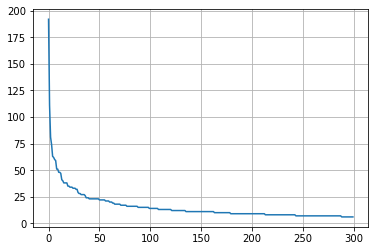

In [88]:
freqs = lemmas_no_stop[0].value_counts()

fig, ax = plt.subplots()
ax.plot(range(300), freqs[:300])
plt.grid()
plt.show()

In [92]:
lemmas_no_stop[0].value_counts().head(300)

–±–∞–Ω–∫       192
–∫–∞—Ä—Ç–∞      111
–∫—Ä–µ–¥–∏—Ç      81
–≤–µ—Å—å        74
—Å—á–µ—Ç        63
          ... 
–º–µ—Å—è—Ü,       6
–≥–æ—Ä—è—á–∏–π      6
–æ–±—â–∏–π        6
–ø—Ä–æ—Å—å–±–∞      6
–∑–∞–π—Ç–∏        6
Name: 0, Length: 300, dtype: int64

–ö—Ä–∏–≤–∞—è –•–∏–ø—Å–∞

In [180]:
df = pd.DataFrame(sample.text)

In [182]:
df_10k = df.head(10000)

In [183]:
cnt = Counter()
n_words = []
n_tokens = []
tokens = []
for index, row in tqdm(df_10k.iterrows(), total = len(df_10k)):
    tokens = word_tokenize(row['text'])
    cnt.update([token for token in tokens if token not in punctuation])
    n_words.append(len(cnt))
    n_tokens.append(sum(list(cnt.values())))


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10000/10000 [01:12<00:00, 137.07it/s]


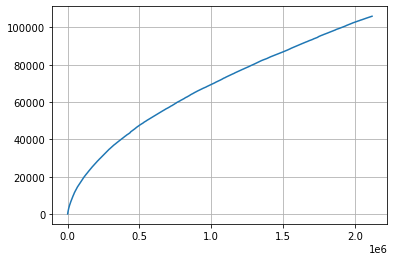

In [184]:
fig, ax = plt.subplots()
ax.plot(n_tokens, n_words)
plt.grid()
plt.show()

#### 6. –û—Ç–≤–µ—Ç—å—Ç–µ –Ω–∞ —Å–ª–µ–¥—É—é—â–∏–µ –≤–æ–ø—Ä–æ—Å—ã:
* –∫–∞–∫–æ–µ —Å–ª–æ–≤–æ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —á–∞—â–µ, "—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" –∏–ª–∏ "–∫–ª–∏–µ–Ω—Ç"?
* —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —Å–ª–æ–≤–∞ "–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ" –∏ "–¥–æ–≤–µ—Ä–∏–µ"?

In [185]:
freqs['—Å–æ—Ç—Ä—É–¥–Ω–∏–∫']

47

In [187]:
freqs['–∫–ª–∏–µ–Ω—Ç']

41

–í—ã–≤–æ–¥: —Å–ª–æ–≤–æ "—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —á–∞—â–µ, —á–µ–º —Å–ª–æ–≤–æ "–∫–ª–∏–µ–Ω—Ç".

In [188]:
freqs['–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ']

1

In [189]:
freqs['–¥–æ–≤–µ—Ä–∏–µ']

2

–í—ã–≤–æ–¥: —Å–ª–æ–≤–æ "–¥–æ–≤–µ—Ä–∏–µ" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —á–∞—â–µ, —á–µ–º —Å–ª–æ–≤–æ "–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ".

#### 7. –í –ø–æ–ª–µ "rating_grade" –∑–∞–ø–∏—Å–∞–Ω–∞ –æ—Ü–µ–Ω–∫–∞ –æ—Ç–∑—ã–≤–∞ –ø–æ —à–∫–∞–ª–µ –æ—Ç 1 –¥–æ 5. –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –º–µ—Ä—É  ùë°ùëì‚àíùëñùëëùëì , –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –Ω–∞–π—Ç–∏ –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ –∏ –±–∏–≥—Ä–∞–º—ã –¥–ª—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ (—Å –æ—Ü–µ–Ω–∫–æ–π 5) –∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ (—Å –æ—Ü–µ–Ω–∫–æ–π 1)

In [214]:
data = pd.DataFrame(responses)

In [216]:
data_neg = data[data.rating_grade == 1]

In [218]:
data_neg.shape

(47387, 10)

In [219]:
data_pos = data[data.rating_grade == 5]

In [220]:
data_pos.shape

(14713, 10)

–ö–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞

In [232]:
vec_neg = TfidfVectorizer()
bow_neg = vec_neg.fit_transform(data_neg.text)

In [241]:
vec_neg.get_feature_names()[0:10]

['00',
 '000',
 '0000',
 '00000',
 '000000',
 '0000000',
 '00000000',
 '0000000000',
 '00000000000',
 '000000000000000']

In [238]:
vec_pos = TfidfVectorizer()
bow_pos = vec_pos.fit_transform(data_pos.text)

In [240]:
vec_pos.get_feature_names()[0:10]

['00',
 '000',
 '0000',
 '00000',
 '000001570510',
 '00001422',
 '0001',
 '000107',
 '0001639',
 '00017']

–ë–∏–≥—Ä–∞–º–º—ã

In [242]:
vec_neg_2 = TfidfVectorizer(ngram_range = (2,2))
bow_neg = vec_neg_2.fit_transform(data_neg.text)

In [243]:
vec_neg_2.get_feature_names()[0:10]

['00 00',
 '00 000',
 '00 0000',
 '00 00eur',
 '00 00—á',
 '00 01',
 '00 017322',
 '00 02',
 '00 03',
 '00 03–º–∞—Ä']

In [244]:
vec_pos_2 = TfidfVectorizer(ngram_range = (2,2))
bow_pos = vec_pos_2.fit_transform(data_pos.text)

In [247]:
vec_pos_2.get_feature_names()[1000 : 1010]

['01 2010',
 '01 2011',
 '01 2012',
 '01 2012–≥',
 '01 2013',
 '01 2014',
 '01 2014–≥',
 '01 2015',
 '01 2015–≥',
 '01 22']

## –ß–∞—Å—Ç—å 2. –¢–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ [20/100]

1. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏—Ö –º–æ–¥–µ–ª–µ–π –∫–æ–ª–ª–µ–∫—Ü–∏–∏ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ —Å —Ä–∞–∑–Ω—ã–º —á–∏—Å–ª–æ–º —Ç–µ–º. –ü—Ä–∏–≤–µ–¥–∏—Ç–µ –ø—Ä–∏–º–µ—Ä—ã –ø–æ–Ω—è—Ç–Ω—ã—Ö (–∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º—ã—Ö) —Ç–µ–º.
2. –ù–∞–π–¥–∏—Ç–µ —Ç–µ–º—ã, –≤ –∫–æ—Ç–æ—Ä—ã—Ö —É–ø–æ–º—è–Ω—É—Ç—ã –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–µ –±–∞–Ω–∫–∏ (–°–±–µ—Ä–±–∞–Ω–∫, –í–¢–ë, –¥—Ä—É–≥–æ–π –±–∞–Ω–∫). –ú–æ–∂–µ—Ç–µ –ª–∏ –≤—ã –∏—Ö –ø—Ä–æ–∫–æ–º–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å / –æ–±—ä—è—Å–Ω–∏—Ç—å?

–≠—Ç–∞ —á–∞—Å—Ç—å –∑–∞–¥–∞–Ω–∏—è –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–¥–µ–ª–∞–Ω–∞ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º gensim. 

1. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏—Ö –º–æ–¥–µ–ª–µ–π –∫–æ–ª–ª–µ–∫—Ü–∏–∏ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ —Å —Ä–∞–∑–Ω—ã–º —á–∏—Å–ª–æ–º —Ç–µ–º. –ü—Ä–∏–≤–µ–¥–∏—Ç–µ –ø—Ä–∏–º–µ—Ä—ã –ø–æ–Ω—è—Ç–Ω—ã—Ö (–∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º—ã—Ö) —Ç–µ–º.

In [331]:
texts = [text.split() for text in data.text]

In [333]:
len(texts)

153499

In [332]:
dictionary = Dictionary(texts)

In [334]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [335]:
len(corpus)

153499

In [336]:
len(dictionary)

1111876

In [338]:
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [340]:
# –¢–µ–º–∞—Ç–∏—á–µ—Å–∫–∞—è –º–æ–¥–µ–ª—å –¥–ª—è —á–∏—Å–ª–∞ —Ç–µ–º, —Ä–∞–≤–Ω–æ–≥–æ 30
lsi = lsimodel.LsiModel(corpus = corpus_tfidf, id2word = dictionary, num_topics = 30)

In [344]:
# –ü—Ä–∏–º–µ—Ä –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ–π —Ç–µ–º—ã –ø—Ä–æ QIWI-–∫–æ—à–µ–ª–µ–∫
lsi.show_topic(20)

[('–∫–æ—à–µ–ª–µ–∫', 0.19866145419532893),
 ('—Å—Ä–µ–¥—Å—Ç–≤', -0.19370977998987404),
 ('—Å—Ä–µ–¥—Å—Ç–≤–∞', -0.18932384476829386),
 ('—Å–º—Å', -0.18711900500531248),
 ('–¥–µ–Ω–µ–∂–Ω—ã—Ö', -0.18534055742331812),
 ('–¥–µ–Ω–µ–∂–Ω—ã–µ', -0.17850429709974458),
 ('–∫–∏–≤–∏', 0.16944104040594696),
 ('QIWI', 0.15050872722886122),
 ('-', -0.11758635674300033),
 ('—Å–ª—É–∂–±—É', 0.1147689423298877)]

2. –ù–∞–π–¥–∏—Ç–µ —Ç–µ–º—ã, –≤ –∫–æ—Ç–æ—Ä—ã—Ö —É–ø–æ–º—è–Ω—É—Ç—ã –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–µ –±–∞–Ω–∫–∏ (–°–±–µ—Ä–±–∞–Ω–∫, –í–¢–ë, –¥—Ä—É–≥–æ–π –±–∞–Ω–∫). –ú–æ–∂–µ—Ç–µ –ª–∏ –≤—ã –∏—Ö –ø—Ä–æ–∫–æ–º–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å / –æ–±—ä—è—Å–Ω–∏—Ç—å?

In [347]:
lsi.show_topic(23)

[('–∑–≤–æ–Ω–∫–∏', 0.2444089869277422),
 ('–∫–æ—à–µ–ª–µ–∫', 0.22243242509375957),
 ('QIWI', 0.19518534722413602),
 ('–∫–∏–≤–∏', 0.17497470963107573),
 ('—Å–º—Å', -0.1655175416307376),
 ('—Å—Ä–µ–¥—Å—Ç–≤–∞', 0.14634943881949525),
 ('–¥–µ–Ω–µ–∂–Ω—ã–µ', 0.12939792939774022),
 ('–¥–µ–Ω–µ–∂–Ω—ã—Ö', 0.12367113948663433),
 ('Visa', 0.12045881373990765),
 ('–°–±–µ—Ä–±–∞–Ω–∫–∞', -0.11407363824842677)]

–ú–æ–∂–Ω–æ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç—å, —á—Ç–æ –≤ —ç—Ç–æ–π —Ç–µ–º–µ —Ä–µ—á—å –∏–¥–µ—Ç –æ –ø–µ—Ä–µ–≤–æ–¥–µ –¥–µ–Ω–µ–∂–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤ —Å –∫–∞—Ä—Ç—ã –°–±–µ—Ä–±–∞–Ω–∫–∞ –Ω–∞ QIWI-–∫–æ—à–µ–ª–µ–∫.

## –ß–∞—Å—Ç—å 3. –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–æ–≤ [40/100]

–°—Ñ–æ—Ä–º—É–ª–∏—Ä—É–µ–º –¥–ª—è –ø—Ä–æ—Å—Ç–æ—Ç—ã –∑–∞–¥–∞—á—É –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏: –±—É–¥–µ–º –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å –Ω–∞ –¥–≤–∞ –∫–ª–∞—Å—Å–∞, —Ç–æ –µ—Å—Ç—å, —Ä–∞–∑–ª–∏—á–∞—Ç—å —Ä–µ–∑–∫–æ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ –æ—Ç–∑—ã–≤—ã (—Å –æ—Ü–µ–Ω–∫–æ–π 1) –∏ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ –æ—Ç–∑—ã–≤—ã (—Å –æ—Ü–µ–Ω–∫–æ–π 5). 

1.  –°–æ—Å—Ç–∞–≤—å—Ç–µ –æ–±—É—á–∞—é—â–µ–µ –∏ —Ç–µ—Å—Ç–æ–≤–æ–µ –º–Ω–æ–∂–µ—Å—Ç–≤–æ: –≤—ã–±–µ—Ä–∏—Ç–µ –∏–∑ –≤—Å–µ–≥–æ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö N1 –æ—Ç–∑—ã–≤–æ–≤ —Å –æ—Ü–µ–Ω–∫–æ–π 1 –∏ N2 –æ—Ç–∑—ã–≤–æ–≤ —Å –æ—Ü–µ–Ω–∫–æ–π 5 (–∑–Ω–∞—á–µ–Ω–∏–µ N1 –∏ N2 ‚Äì –Ω–∞ –≤–∞—à–µ —É—Å–º–æ—Ç—Ä–µ–Ω–∏–µ). –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ ```sklearn.model_selection.train_test_split``` –¥–ª—è —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –º–Ω–æ–∂–µ—Å—Ç–≤–∞ –æ—Ç–æ–±—Ä–∞–Ω–Ω—ã—Ö –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ –Ω–∞ –æ–±—É—á–∞—é—â–µ–µ –∏ —Ç–µ—Å—Ç–æ–≤–æ–µ. 
2. –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –ª—é–±–æ–π –∏–∑–≤–µ—Å—Ç–Ω—ã–π –≤–∞–º –∞–ª–≥–æ—Ä–∏—Ç–º –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–æ–≤ –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ –∏ –ø–æ–ª—É—á–∏—Ç–µ baseline. –°—Ä–∞–≤–Ω–∏—Ç–µ —Ä–∞–∑–Ω—ã–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–∞: –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ —Ç–æ–ª—å–∫–æ —É–Ω–∏–≥—Ä–∞–º, –ø–∞—Ä –∏–ª–∏ —Ç—Ä–æ–µ–∫ —Å–ª–æ–≤ –∏–ª–∏ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Å–∏–º–≤–æ–ª—å–Ω—ã—Ö $n$-–≥—Ä–∞–º. 
3. –°—Ä–∞–≤–Ω–∏—Ç–µ, –∫–∞–∫ –∏–∑–º–µ–Ω—è–µ—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ —Å–∫—Ä—ã—Ç—ã—Ö —Ç–µ–º –≤ –∫–∞—á–µ—Å—Ç–≤–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
* 1-—ã–π –≤–∞—Ä–∏–∞–Ω—Ç: $tf-idf$ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ (```sklearn.feature_extraction.text.TfidfTransformer```) –∏ —Å–∏–Ω–≥—É–ª—è—Ä–Ω–æ–µ —Ä–∞–∑–ª–æ–∂–µ–Ω–∏–µ (–æ–Ω–æ –∂–µ ‚Äì –ª–∞—Ç–µ–Ω—Ç—ã–π —Å–µ–º–∞–Ω—Ç–∏—á–µ—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑) (```sklearn.decomposition.TruncatedSVD```), 
* 2-–æ–π –≤–∞—Ä–∏–∞–Ω—Ç: —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–µ –º–æ–¥–µ–ª–∏ LDA (```sklearn.decomposition.LatentDirichletAllocation```). 

–ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ accuracy –∏ F-measure –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏. 

–ù–∏–∂–µ –Ω–∞–ø–∏—Å–∞–Ω –ø—Ä–∏–º–µ—Ä–Ω—ã–π Pipeline –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–æ–≤. 

–≠—Ç–∞ —á–∞—Å—Ç—å –∑–∞–¥–∞–Ω–∏—è –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–¥–µ–ª–∞–Ω–∞ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º sklearn. 

#### 1. –°–æ—Å—Ç–∞–≤—å—Ç–µ –æ–±—É—á–∞—é—â–µ–µ –∏ —Ç–µ—Å—Ç–æ–≤–æ–µ –º–Ω–æ–∂–µ—Å—Ç–≤–æ: –≤—ã–±–µ—Ä–∏—Ç–µ –∏–∑ –≤—Å–µ–≥–æ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö N1 –æ—Ç–∑—ã–≤–æ–≤ —Å –æ—Ü–µ–Ω–∫–æ–π 1 –∏ N2 –æ—Ç–∑—ã–≤–æ–≤ —Å –æ—Ü–µ–Ω–∫–æ–π 5

In [264]:
data_neg.loc[ : ,'type'] = 'neg'

In [302]:
data_neg_1 = data_neg.sample(data_pos.shape[0])

In [304]:
data_neg_1.shape

(14713, 11)

In [261]:
data_pos.loc[ : ,'type'] = 'pos'

In [292]:
data_pos.shape[0]

14713

In [305]:
data_all = data_neg_1.merge(data_pos, how = 'outer')

In [306]:
data_all.tail()

city rating_not_checked  \
29421  None              False   
29422  None              False   
29423  None              False   
29424  None              False   
29425  None              False   

                                                   title  num_comments  \
29421                   –ü–æ–≤—ã—Å–∏–ª–æ—Å—å –∫–∞—á–µ—Å—Ç–≤–æ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è             0   
29422              –°—Ç–∞–±–∏–ª—å–Ω—ã–π –±–∞–Ω–∫ —Å –≤—ã—Å–æ–∫–∏–º–∏ –ø—Ä–æ—Ü–µ–Ω—Ç–∞–º–∏             0   
29423  –ù—É —Ç–æ–≥–¥–∞ –∫–æ–ø–∏—Ç–µ –¥–µ–Ω—é–∂–∫–∏ –∏ –ø–æ–∫—É–ø–∞–π—Ç–µ –Ω–µ –≤ –∫—Ä–µ–¥–∏...             4   
29424                                 –ù–µ –≤—Å–µ —Ç–∞–∫ —Å—Ç—Ä–∞—à–Ω–æ             0   
29425                                    –ë—ã—Å—Ç—Ä–æ –∏ —É–¥–æ–±–Ω–æ             0   

          bank_license      author                       bank_name  \
29421  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1623       –ê—Ç–º–æ—Å                          –í–¢–ë 24   
29422  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1971  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä–∞  –•–∞–Ω—Ç—ã-–ú–∞–Ω—Å–∏–π—Å–∫–∏–π –±–∞–Ω–∫ –û—Ç–∫—Ä—ã—Ç–∏–µ   
29423  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2289       irzik                –†—É—Å—Å–∫–∏–π –°—Ç–∞–Ω–¥–∞—Ä—Ç   
29424  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2557        –í–µ—Ä–∞                        –°–∏—Ç–∏–±–∞–Ω–∫   
29425  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1326       –î–µ–Ω–∏—Å                      –ê–ª—å—Ñ–∞-–ë–∞–Ω–∫   

                  datetime                                               text  \
29421  2005-04-13 12:00:00  –ü–æ–ª—å–∑—É—é—Å—å –±–∞–Ω–∫–æ–º 3 –º–µ—Å—è—Ü–∞ - —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ –æ—Ç–∫—Ä—ã–ª ...   
29422  2005-04-14 13:41:00  –ê —á—Ç–æ –ø–∏—Å–∞—Ç—å? –°—Ç–∞–≤–∫–∏ –ø–æ –≤–∫–ª–∞–¥–∞–º –≤—ã—Å–æ–∫–∏–µ (–¥–æ 13...   
29423  2005-04-14 17:42:00  –ê —è —Å –º—É–∂–µ–º –æ–±—Å—Ç–∞–≤–∏–ª–∞ —Ç–µ—Ö–Ω–∏–∫–æ–π —Å–æ–≤–µ—Ä—à–µ–Ω–Ω–æ –Ω–æ–≤—É...   
29424  2005-05-18 14:38:00  –°–ª–∏—à–∫–æ–º –±–æ–ª—å—à–æ–π –±–∞–Ω–∫, –Ω–µ –≤—Å–µ–≥–¥–∞ —É—á–∏—Ç—ã–≤–∞–µ—Ç –Ω–∞—à—É...   
29425  2005-04-13 17:43:00  –ï—Å–ª–∏ –∫–æ—Ä–æ—Ç–∫–æ, —Ç–æ –º–Ω–µ –Ω—Ä–∞–≤–∏—Ç—Å—è. –ö—Ä–∏–¥–∏—Ç –ø–æ–ª—É—á–∞—Ç—å...   

       rating_grade type  
29421           5.0  pos  
29422           5.0  pos  
29423           5.0  pos  
29424           5.0  pos  
29425           5.0  pos

In [307]:
x_train, x_test, y_train, y_test = train_test_split(data_all.text, data_all.type)

#### 2. –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –ª—é–±–æ–π –∏–∑–≤–µ—Å—Ç–Ω—ã–π –≤–∞–º –∞–ª–≥–æ—Ä–∏—Ç–º –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–æ–≤ –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ –∏ –ø–æ–ª—É—á–∏—Ç–µ baseline. –°—Ä–∞–≤–Ω–∏—Ç–µ —Ä–∞–∑–Ω—ã–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–∞: –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ —Ç–æ–ª—å–∫–æ —É–Ω–∏–≥—Ä–∞–º, –ø–∞—Ä –∏–ª–∏ —Ç—Ä–æ–µ–∫ —Å–ª–æ–≤ –∏–ª–∏ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Å–∏–º–≤–æ–ª—å–Ω—ã—Ö  ùëõ -–≥—Ä–∞–º

**CountVectorizer**  
**–£–Ω–∏–≥—Ä–∞–º–º–∞**

In [308]:
vec = CountVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train)

In [309]:
clf = LogisticRegression(random_state=42, solver='liblinear')
clf.fit(bow, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [310]:
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         neg       0.95      0.95      0.95      3659
         pos       0.95      0.95      0.95      3698

    accuracy                           0.95      7357
   macro avg       0.95      0.95      0.95      7357
weighted avg       0.95      0.95      0.95      7357



**–ë–∏–≥—Ä–∞–º–º–∞**

In [311]:
vec = CountVectorizer(ngram_range=(2, 2))
bow = vec.fit_transform(x_train)

In [312]:
clf = LogisticRegression(random_state=42, solver='liblinear')
clf.fit(bow, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [313]:
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         neg       0.94      0.94      0.94      3657
         pos       0.94      0.94      0.94      3700

    accuracy                           0.94      7357
   macro avg       0.94      0.94      0.94      7357
weighted avg       0.94      0.94      0.94      7357



–ü—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –±–∏–≥—Ä–∞–º–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç —É—Ö—É–¥—à–∏–ª—Å—è –ø—Ä–∏–±–ª–∏–∑–∏—Ç–µ–ª—å–Ω–æ –Ω–∞ 0,01.

**–¢—Ä–∏–≥—Ä–∞–º–º–∞**

In [314]:
vec = CountVectorizer(ngram_range=(2, 2))
bow = vec.fit_transform(x_train)

In [315]:
clf = LogisticRegression(random_state=42, solver='liblinear')
clf.fit(bow, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [316]:
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         neg       0.94      0.94      0.94      3657
         pos       0.94      0.94      0.94      3700

    accuracy                           0.94      7357
   macro avg       0.94      0.94      0.94      7357
weighted avg       0.94      0.94      0.94      7357



–ü—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ —Ç—Ä–∏–≥—Ä–∞–º–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç –Ω–µ –∏–∑–º–µ–Ω–∏–ª—Å—è.
–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –ø–æ–ª—É—á–µ–Ω—ã —Å–ª–µ–¥—É—é—â–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è precision –∏ f1-score:
    * —É–Ω–∏–≥—Ä–∞–º–º–∞: 0,95;
    * –±–∏–≥—Ä–∞–º–º–∞:  0,94;
    * —Ç—Ä–∏–≥—Ä–∞–º–º–∞: 0,94.

**TfidfVectorizer**  
**–£–Ω–∏–≥—Ä–∞–º–º–∞**

In [317]:
vec = TfidfVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train)

In [318]:
clf = LogisticRegression(random_state=42, solver='liblinear')
clf.fit(bow, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [319]:
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         neg       0.96      0.95      0.95      3711
         pos       0.95      0.96      0.95      3646

    accuracy                           0.95      7357
   macro avg       0.95      0.95      0.95      7357
weighted avg       0.95      0.95      0.95      7357



–ü—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ TF-IDF –¥–ª—è —É–Ω–∏–≥—Ä–∞–º–º –∑–Ω–∞—á–µ–Ω–∏–µ —Ç–æ—á–Ω–æ—Å—Ç–∏ –ø—Ä–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —É–≤–µ–ª–∏—á–∏–ª–æ—Å—å (–¥–æ 0,96).

**–ë–∏–≥—Ä–∞–º–º–∞**

In [320]:
vec = TfidfVectorizer(ngram_range=(2, 2))
bow = vec.fit_transform(x_train)

In [321]:
clf = LogisticRegression(random_state=42, solver='liblinear')
clf.fit(bow, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [322]:
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         neg       0.95      0.92      0.93      3759
         pos       0.92      0.95      0.93      3598

    accuracy                           0.93      7357
   macro avg       0.93      0.93      0.93      7357
weighted avg       0.93      0.93      0.93      7357



In [ ]:
–ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ TF-IDF –¥–ª—è –±–∏–≥—Ä–∞–º–º –ø—Ä–∏–≤–æ–¥–∏—Ç –∫ —Å–Ω–∏–∂–µ–Ω–∏ —Ç–æ—á–Ω–æ—Å—Ç–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ –¥–æ 0,92.

**–¢—Ä–∏–≥—Ä–∞–º–º—ã**

In [323]:
vec = TfidfVectorizer(ngram_range=(3, 3))
bow = vec.fit_transform(x_train)

In [324]:
clf = LogisticRegression(random_state=42, solver='liblinear')
clf.fit(bow, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [325]:
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         neg       0.91      0.87      0.89      3825
         pos       0.87      0.91      0.89      3532

    accuracy                           0.89      7357
   macro avg       0.89      0.89      0.89      7357
weighted avg       0.89      0.89      0.89      7357



–ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ TF-IDF –¥–ª—è —Ç—Ä–∏–≥—Ä–∞–º–º –≤–µ–¥–µ—Ç –∫ –¥–∞–ª—å–Ω–µ–π—à–µ–º—É —Å–Ω–∏–∂–µ–Ω–∏—é —Ç–æ—á–Ω–æ—Å—Ç–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è.
–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –ø–æ–ª—É—á–µ–Ω—ã —Å–ª–µ–¥—É—é—â–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è f1-score:
* —É–Ω–∏–≥—Ä–∞–º–º—ã: 0,95;
* –±–∏–≥—Ä–∞–º–º—ã:  0,93;
* —Ç—Ä–∏–≥—Ä–∞–º–º—ã: 0,89.

3. –°—Ä–∞–≤–Ω–∏—Ç–µ, –∫–∞–∫ –∏–∑–º–µ–Ω—è–µ—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ —Å–∫—Ä—ã—Ç—ã—Ö —Ç–µ–º –≤ –∫–∞—á–µ—Å—Ç–≤–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:

In [400]:
clf_svd = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1, 1))),
    ('tm', TruncatedSVD(n_components = 1000)), 
    ('clf', LogisticRegression(random_state=42, solver='liblinear')),
])
clf_svd.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()),
                ('tm', TruncatedSVD(n_components=1000)),
                ('clf',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [401]:
pred = clf_svd.predict(x_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         neg       0.94      0.94      0.94      3644
         pos       0.94      0.94      0.94      3713

    accuracy                           0.94      7357
   macro avg       0.94      0.94      0.94      7357
weighted avg       0.94      0.94      0.94      7357



–ü—Ä–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç, —Ä–∞–≤–Ω–æ–º 1000, —É–¥–∞–µ—Ç—Å—è –¥–æ—Å—Ç–∏—á—å –∑–Ω–∞—á–µ–Ω–∏—è f1-score, —Ä–∞–≤–Ω–æ–≥–æ 0,94, —á—Ç–æ –Ω–µ—Å–∫–æ–ª—å–∫–æ –Ω–∏–∂–µ –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è –ø—Ä–æ—Å—Ç–æ–≥–æ CountVectorizer –¥–ª—è —É–Ω–∏–≥—Ä–∞–º–º (0,95).

In [407]:
clf_lda = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1, 1))),
    ('tm', LDA(n_components=60, max_iter = 4,
              n_jobs=4, learning_method='batch',
              verbose=1)), 
    ('clf', LogisticRegression(random_state=42, solver='liblinear')),
])
clf_lda.fit(x_train, y_train)

iteration: 1 of max_iter: 4
iteration: 2 of max_iter: 4
iteration: 3 of max_iter: 4
iteration: 4 of max_iter: 4


Pipeline(steps=[('vect', CountVectorizer()),
                ('tm',
                 LatentDirichletAllocation(max_iter=4, n_components=60,
                                           n_jobs=4, verbose=1)),
                ('clf',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [408]:
pred = clf_lda.predict(x_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         neg       0.91      0.85      0.88      3900
         pos       0.85      0.91      0.88      3457

    accuracy                           0.88      7357
   macro avg       0.88      0.88      0.88      7357
weighted avg       0.88      0.88      0.88      7357



–ü—Ä–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç, —Ä–∞–≤–Ω–æ–º 60, —É–¥–∞–µ—Ç—Å—è –¥–æ—Å—Ç–∏—á—å –∑–Ω–∞—á–µ–Ω–∏—è f1-score, —Ä–∞–≤–Ω–æ–≥–æ 0,88, —á—Ç–æ –Ω–µ—Å–∫–æ–ª—å–∫–æ –Ω–∏–∂–µ –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è –ø—Ä–æ—Å—Ç–æ–≥–æ CountVectorizer –¥–ª—è —É–Ω–∏–≥—Ä–∞–º–º (0,95).